In [1]:
## widen the cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
from util import *
from models import *
from get_primes import get_primes
from cfg import get_cfg
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm as tqdm_normal
%matplotlib inline

In [3]:
d = 12
k = 7
M = 50000
N = 20
T = 30000
SEED = 3019
# 619 3019 1009 119 419 719 1319 4001 911 811 1109 4691

feature_bound = 1.
mapping_bound = 1.
param_bound = 1.

In [4]:
# seeds = get_primes(start=200, end=6000)
# print(seeds)

In [5]:
# reward_std = 0.1
# context_std = 1 / np.sqrt(T)
# alphas = [0., 0.001, 0.01, 0.05, 0.1]
# trials = 1

# for seed in seeds:
#     print(f"seed = {seed}")
#     Z = feature_sampler(dimension=k, feat_dist="gaussian", size=M, disjoint=True, 
#                         bound=feature_bound, bound_method="scaling", random_state=seed)
#     A = mapping_generator(latent_dim=k, obs_dim=d, distribution="uniform", 
#                           upper_bound=mapping_bound, random_state=((seed*13)//3))
#     true_mu = param_generator(dimension=k, distribution="uniform", disjoint=True, 
#                               bound=param_bound, random_state=((seed*13)//3)+1)
#     B = left_pseudo_inverse(A)
#     true_theta = B.T @ true_mu
    
#     result = dict()
#     for alpha in alphas:
#         print(f"alpha={alpha}")
#         regret_container = np.zeros(trials, dtype=object)
#         error_container = np.zeros(trials, dtype=object)
#         for trial in range(trials):
#             regrets = np.zeros(T)
#             errors = np.zeros(T)
#             agent = LinUCB(d=d, alpha=alpha, lbda=1.)
#             for t in tqdm(range(T)):
#                 seed_ = seed + (100000 * trial) + t + int(1000000*alpha)
#                 idx = np.random.choice(np.arange(M), size=N, replace=False)
#                 latent_set = Z[idx, :]

#                 ## sample the context noise and generate the observable feature
#                 context_noise = subgaussian_noise(distribution="gaussian", size=(N*d), std=context_std, random_state=seed_).reshape(N, d)
#                 action_set = latent_set @ A.T + context_noise

#                 ## clipping
# #                 for i in range(N):
# #                     action = action_set[i, :]
# #                     if l2norm(action) > feature_bound:
# #                         action_set[i, :] *= (feature_bound / l2norm(action))

# #                 ## scaling
# #                 maxnorm = np.max([l2norm(action) for action in action_set])
# #                 action_set *= (feature_bound / maxnorm)

#                 ## sample the reward noise and compute the reward
#                 reward_noise = subgaussian_noise(distribution="gaussian", size=N, std=reward_std, random_state=seed_+1)
#                 expected_reward = latent_set @ true_mu
#                 if t == 0:
#                     print(f"Reward range: [{np.min(expected_reward):.5f}, {np.max(expected_reward):.5f}]")
#                 true_reward = expected_reward + reward_noise
#                 optimal_arm = np.argmax(expected_reward)
#                 optimal_reward = expected_reward[optimal_arm]

#                 ## choose the best action
#                 chosen_arm = agent.choose(action_set)
#                 chosen_reward = true_reward[chosen_arm]
#                 chosen_context = action_set[chosen_arm]

#                 ## compute the regret and the theta distances
#                 regrets[t] = optimal_reward - expected_reward[chosen_arm]
#                 errors[t] = l2norm(true_theta - agent.theta_hat)

#                 ## update the agent
#                 agent.update(x=chosen_context, r=chosen_reward)

#             regret_container[trial] = np.cumsum(regrets)
#             error_container[trial] = errors
#         result[alpha] = (regret_container, error_container)
    
#     NROWS, NCOLS = 1, 2
#     title = r"$\sigma_\eta=$"
#     fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(13, 5))

#     for i in range(NROWS):
#         for j in range(NCOLS):
#             for key in result:
#                 item = result[key][j]
#                 ax[j].plot(np.mean(item, axis=0), label=f"alpha={key}")
#                 ax[j].set_xlabel("Round")
#                 if j == 0:
#                     ax[j].set_ylabel(r"$R_t$")
#                     ax[j].set_title("Regret")
#                 else:
#                     ax[j].set_ylim(-0.1, None)
#                     ax[j].set_ylabel(r"${\Vert \hat{\theta}_t - \theta_*\Vert}_2$")
#                     ax[j].set_title(r"Parameter Empirical Error")
#                 ax[j].grid(True)
#                 ax[j].legend()

#     fig.tight_layout(rect=[0, 0, 1, 0.95])
#     fig.suptitle(f"{title}{context_std:.5f}, seed={seed}")
#     fname = f"seed_{seed}.png"
#     save_plot(fig, path='seed_comparison', fname=fname)
#     plt.show()

In [6]:
X = feature_sampler(dimension=d, feat_dist="gaussian", size=M, disjoint=True, bound=feature_bound, 
                    bound_method="scaling", random_state=SEED)
print(f"Shape of the latent feature sets: {X.shape}")
print(f"The first feature: {X[0]}")
print(f"Maximum norm: {np.max([l2norm(observe) for observe in X]):.5f}")

Shape of the latent feature sets: (50000, 12)
The first feature: [ 0.38757461 -0.00849855  0.01965514 -0.02066849  0.15697979 -0.01535089
  0.14544185 -0.07927748  0.13024495 -0.03918626 -0.2268953  -0.20259966]
Maximum norm: 1.00000


In [7]:
# ex = np.random.uniform(-1, 1, size=(12, 8))
# u, sigma, v_T = np.linalg.svd(ex)
# sigma = sigma - np.min(sigma) + 1.
# print(sigma)

# sig_v = make_diagonal(sigma, ex.shape)
# ex_ = u @ sig_v @ v_T
# print(ex_.shape)

In [8]:
A = mapping_generator(latent_dim=k, obs_dim=d, distribution="uniform", lower_bound=mapping_bound, random_state=SEED)
print(f"Shape of the mapping: {A.shape}")
print(A)
print(f"Maximum singular value: {np.linalg.norm(A, 2):.5f}")
print(f"Singular values of A: {np.linalg.svd(A)[1]}")

Shape of the mapping: (12, 7)
[[ 0.02524721  0.14600188 -0.59317845  0.57854128 -0.12243653  0.63389141
  -0.22905956]
 [ 0.61332903 -0.33380598  0.66248425 -0.09423264 -0.31002688  0.13853379
   0.10889289]
 [ 0.83917371  0.58929633  0.13310325  0.24569583  0.35176064  0.86389319
  -0.07084046]
 [-0.47274315 -0.66544218  0.56326848 -0.01722126  0.26298194  0.20487212
  -0.63825013]
 [-0.29803866 -0.5207819   0.10780609 -0.11560704 -0.84922008  0.68673843
  -0.61718328]
 [-0.13931998 -0.14705236  0.28872025 -0.49256397 -0.11092831  0.50514474
   0.90295877]
 [ 0.74550592  0.271646    0.79103257 -0.60089299 -0.34730294 -0.53168062
  -0.20108627]
 [ 0.01459591 -0.26595258  0.41313492  0.71965694  0.59514836  0.3529657
  -0.2557965 ]
 [ 0.60109325  0.3271362  -0.23161866  0.79995391  0.00193734 -0.65933881
   0.00577464]
 [ 0.52614038 -0.48860968 -0.80799609 -0.15040884 -0.1345525  -0.01259825
  -0.60838373]
 [-0.53842105  0.53982583  0.28137295 -0.09727696 -0.65458002  0.57390383
  -0.76

In [9]:
B = left_pseudo_inverse(A)
print(f"Shape of B: {B.shape}")
print(B)
print(f"Maximum singular value: {np.linalg.norm(B, 2):.5f}")
print(f"Singular values of B: {np.linalg.svd(B)[1]}")

Shape of B: (7, 12)
[[ 0.04469225  0.28754932  0.30349452 -0.12963882  0.02206572  0.0159932
   0.23323325  0.00454185  0.13931681  0.27930043 -0.20763467 -0.04334929]
 [ 0.00875313 -0.31354016  0.27765235 -0.20745368 -0.28470052 -0.13176004
   0.14520099 -0.1592728  -0.01727851 -0.23313409  0.40119666  0.03742276]
 [-0.18143067  0.22670014  0.02633132  0.24326306  0.02189118  0.02095098
   0.23202366  0.24871728  0.01385035 -0.32608057  0.0896579   0.11129774]
 [ 0.20645986  0.13768339 -0.08183576  0.07373222  0.13532097 -0.14169979
  -0.23133878  0.34979251  0.38349986 -0.13251836 -0.06067175  0.33297702]
 [-0.12481744 -0.23529071  0.2315142   0.15130496 -0.42855774 -0.06054226
  -0.05415956  0.18891894 -0.15854908 -0.08306383 -0.13812818 -0.36643163]
 [ 0.20483669  0.07265927  0.36647282 -0.03225736  0.14653491  0.25622459
  -0.16454753  0.07470651 -0.2184302   0.01060507  0.08205885 -0.066489  ]
 [ 0.01308503  0.12308198 -0.05313236 -0.18450475 -0.03332226  0.38875806
  -0.18329428

In [10]:
true_mu = param_generator(dimension=k, distribution="uniform", disjoint=True, bound=param_bound, random_state=SEED+1)
print(f"True mu: {true_mu}")
print(f"Norm of the true mu: {l2norm(true_mu)}")

True mu: [-0.43593901 -0.01224725  0.3377795  -0.43025275 -0.15569189 -0.38336631
 -0.58256765]
Norm of the true mu: 1.0


In [11]:
true_theta = B.T @ true_mu
print(f"True theta: {true_theta}")
print(f"Norm of the true theta: {l2norm(true_theta)}")

True theta: [-0.23642112 -0.1671038  -0.23718636  0.20579707 -0.02700144 -0.25259463
  0.2527487  -0.09736633 -0.09694558 -0.07574978  0.29668019 -0.14050538]
Norm of the true theta: 0.6657484820071807


In [12]:
reward_std = 0.1
context_std = 1 / T
alphas = [0., 0.01, 0.1, 0.3, 0.5]
trials = 3

In [13]:
result = dict()
for alpha in alphas:
    print(f"alpha={alpha}")
    regret_container = np.zeros(trials, dtype=object)
    error_container = np.zeros(trials, dtype=object)
    for trial in range(trials):
        regrets = np.zeros(T)
        errors = np.zeros(T)
        agent = LinUCB(d=d, alpha=alpha, lbda=1.)
        for t in tqdm(range(T)):
            seed = SEED + (100000 * trial) + t + int(10000000*alpha)
            idx = np.random.choice(np.arange(M), size=N, replace=False)
            action_set = X[idx, :]
            
            ## sample the context noise and generate the observable feature
            context_noise = subgaussian_noise(distribution="gaussian", size=(N*d), std=context_std, random_state=seed).reshape(N, d)
            denoised_action_set = action_set - context_noise # (N, d)
            latent_set = denoised_action_set @ B.T # (N, d) @ (d, k) -> (N, k)
            
#             ## clipping
#             for i in range(N):
#                 latent = latent_set[i, :]
#                 if l2norm(latent) > feature_bound:
#                     latent_set[i, :] *= (feature_bound / l2norm(latent))

            ## scaling
#             maxnorm = np.max([l2norm(latent) for latent in latent_set])
#             latent_set *= (feature_bound / maxnorm)
            
            ## sample the reward noise and compute the reward
            reward_noise = subgaussian_noise(distribution="gaussian", size=N, std=reward_std, random_state=seed)
            expected_reward = latent_set @ true_mu
            if t == 0:
                print(f"Reward range: [{np.min(expected_reward):.5f}, {np.max(expected_reward):.5f}]")
            true_reward = expected_reward + reward_noise
            optimal_arm = np.argmax(expected_reward)
            optimal_reward = expected_reward[optimal_arm]
            
            ## choose the best action
            chosen_arm = agent.choose(action_set)
            chosen_reward = true_reward[chosen_arm]
            chosen_context = action_set[chosen_arm]
            
            ## compute the regret and the theta distances
            regrets[t] = optimal_reward - expected_reward[chosen_arm]
            errors[t] = l2norm(true_theta - agent.theta_hat)
            
            ## update the agent
            agent.update(x=chosen_context, r=chosen_reward)
        
        regret_container[trial] = np.cumsum(regrets)
        error_container[trial] = errors
    result[alpha] = (regret_container, error_container)

alpha=0.0


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.21162, 0.20057]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.19601, 0.21525]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.12290, 0.18162]
alpha=0.01


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.18644, 0.21943]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.12290, 0.18162]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.18648, 0.21946]
alpha=0.1


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.15783, 0.21741]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.20710, 0.13865]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.15250, 0.13903]
alpha=0.3


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.22332, 0.13033]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.26997, 0.15830]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.14119, 0.25979]
alpha=0.5


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.25848, 0.11545]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.18759, 0.17491]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.21954, 0.20534]


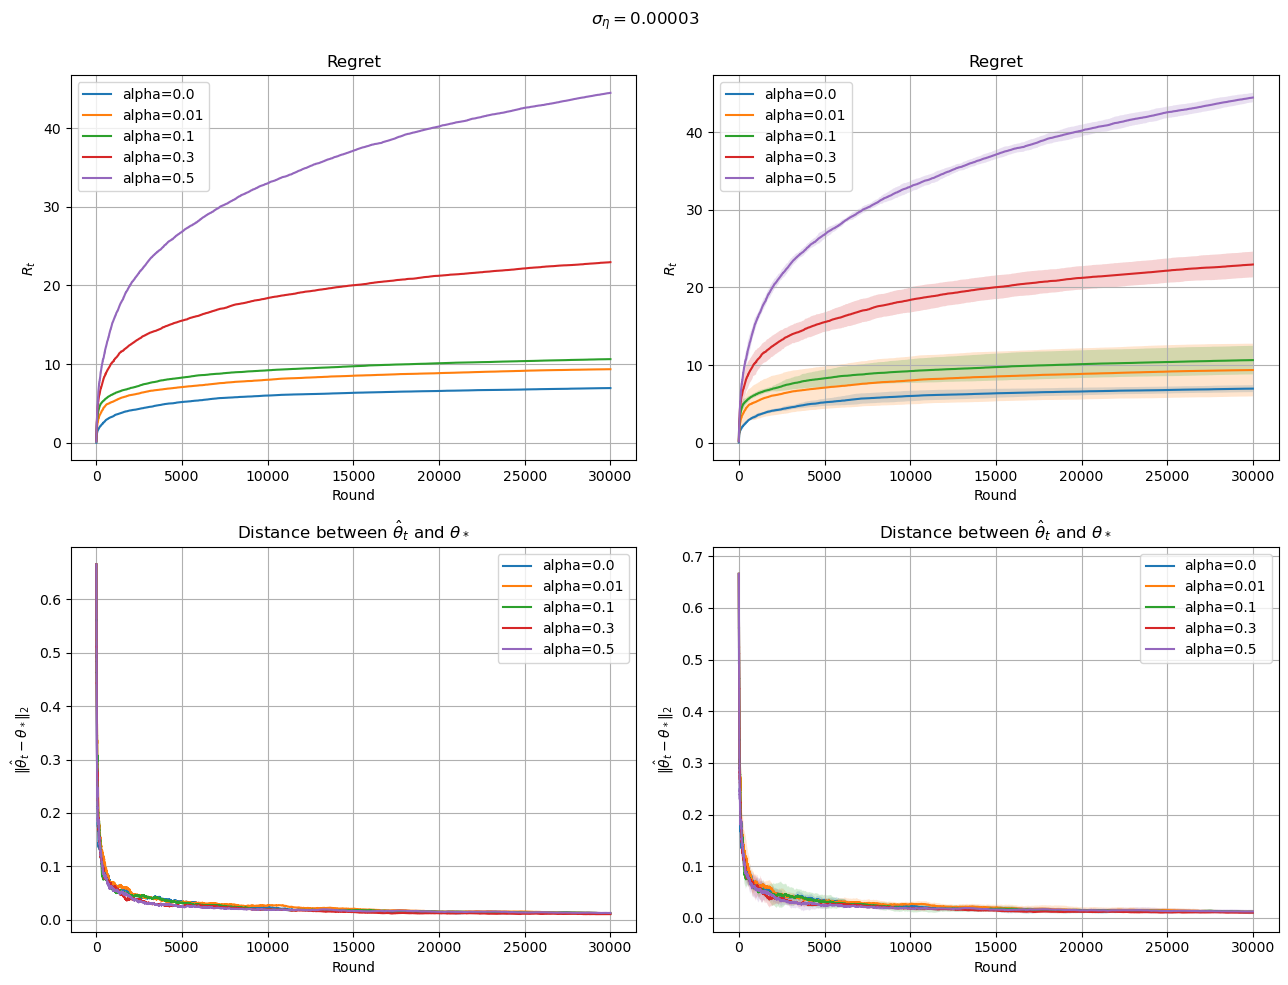

In [14]:
NROWS = NCOLS = 2
title = r"$\sigma_\eta=$"
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(13, 10))

for i in range(NROWS):
    for j in range(NCOLS):
        for key in result:
            item = result[key][i]
            if j == 0:
                ax[i][j].plot(np.mean(item, axis=0), label=f"alpha={key}")
            else:
                mean = np.mean(item, axis=0)
                std = np.std(item, axis=0, ddof=1)
                ax[i][j].plot(mean, label=f"alpha={key}")
                ax[i][j].fill_between(np.arange(T), mean-std, mean+std, alpha=0.2)
            ax[i][j].set_xlabel("Round")
            if i == 0:
                ax[i][j].set_ylabel(r"$R_t$")
                ax[i][j].set_title("Regret")
            else:
                ax[i][j].set_ylabel(r"${\Vert \hat{\theta}_t - \theta_*\Vert}_2$")
                ax[i][j].set_title(r"Distance between $\hat\theta_t$ and $\theta_*$")
            ax[i][j].grid(True)
            ax[i][j].legend()

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle(f"{title}{context_std:.5f}")
fig.show()